# Introduction to Statistical Learning

*Statistical learning* refers to vast set of tools for understanding the data. These tools can be classified as *Supervised* or *unsupervised*. 

- **Supervised** : Uses *historical* and *labeled* data, the machine learning model predicts a value.
- **Unsupervised** : Applied to *unlabeled* data, the machine learning model discovers possible pattern in the data.

The video explaination for Chapter 1 can be found [here](https://www.youtube.com/watch?v=2wLfFB_6SKI&list=PL5-da3qGB5ICcUhueCyu25slvsGp8IDTa&index=1&ab_channel=StatisticalLearning)

To provide an illustration of some applications of statistical learning, Let's look into three data sets.

## Wage Data

We examine a number of factors that relates to wages for a group of males from the Atlantic region of United States. A relationship between *age* , *education* and *year* on year will be derived. 


### Setting up the format

In [1]:
# Standard imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
df_wage = pd.read_csv('data/wage.csv')

In [2]:
df_wage.head()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [3]:
df_wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   sex         3000 non-null   object 
 3   maritl      3000 non-null   object 
 4   race        3000 non-null   object 
 5   education   3000 non-null   object 
 6   region      3000 non-null   object 
 7   jobclass    3000 non-null   object 
 8   health      3000 non-null   object 
 9   health_ins  3000 non-null   object 
 10  logwage     3000 non-null   float64
 11  wage        3000 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 281.4+ KB


In [4]:
# To recreate the plots from book, we will need to use 'R' style plotting. 
#Let's first look into the types of style, we have at our disposal

plt.style.available

## ggplot corresponds to 'R' style plotting. fivethirtyeight is pretty cool too

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [5]:
# Choose 'R' style plotting
# Once set, all following plots will correspond to the same style unless specified otherwise.
plt.style.use('ggplot')

### Examination of *Wage Data*

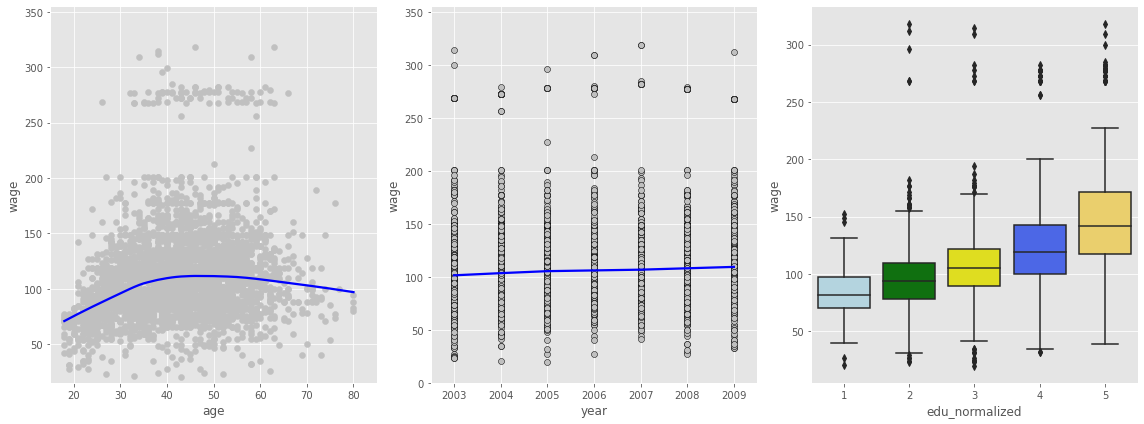

In [87]:
fig,ax = plt.subplots(1,3,figsize = (16,6))

ax[0].scatter(df_wage['age'],df_wage['wage'],color = '#C0C0C0')
sns.regplot(x = 'age',y = 'wage',data = df_wage,lowess = True,scatter = False,ax= ax[0],color = 'b',)
ax[0].set_xlim([15,85])
ax[0].set_ylim([15,355])

ax[1].scatter(df_wage['year'], df_wage['wage'],color = '#C0C0C0',edgecolors= "black")
sns.regplot(x = 'year',y = 'wage',data = df_wage,lowess = True,scatter = False,ax= ax[1],color = 'b')
ax[1].set_xlim([2002.5,2009.5])
ax[1].set_ylim([0,355])



df_wage['edu_normalized'] = df_wage['education'].str[:1].astype(int)

sns.boxplot(x = 'edu_normalized', y = 'wage',data = df_wage,ax = ax[2], palette={1:'lightblue',2:'g',3:'#FFFC0000',4:'#3357FF',5:'#FFDB58'})

plt.tight_layout()

We examine a number of factors that relates to wages for a group of males from the Atlantic region of United States.

- **`Age`** (Left) : A relationship between *age* , *education* and *year* on year will be derived. The left hand panel in the above figure displays wage vs age. There is evidence that wage increases with age but then decreases agin after ~60. The blue line is an approximate trend line which shows the trend visually. There is a significant amount of variation associated with trend line, which tells us that `age` alone is unlikely to predict wage. /n

- **`year`** (Center): Wage increases by approximately \[$10,000\], in a roughly linear fashion between 2003 and 2009. The rise is slight relative to variablity in the data. 

- **`Education Level`** (Right): Boxplot displaying *wage* as a function of `Education Level`, with 1 indicating the lowest level(no high school diploma) and 5(graduate). Wages are greater for individuals with higher education level.

## Stock Market Data

The `wage` data involves predicting a *continuous* or *quantitative* output value. This is referred as `regression` problem. 

In some cases, we may wish to predict a non-numerical value - that is a `categorical` or `qualitative` output. In the data below we will explore the stock market data where the goal is to predict whether the stock market will go up or down the next day. The output variable here is categorical and these type of problems are referred to as classification problems. 

The goal is to predict whether the index will increase or decrease on a given day using the past 5 days’ percentage changes in the index. Here the statistical learning problem does not involve predicting a numerical value. Instead it involves predicting whether a given day’s stock market performance will fall into the `Up` bucket or the `Down` bucket. This is known as a classification problem. A model that could accurately predict the direction in which the market will move would be very useful!



In [88]:
df_market = pd.read_csv('Data/smarket.csv')

In [89]:
df_market.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [103]:
df_market_melt = pd.melt(df_market,id_vars = 'Direction'
                         ,value_vars=['Lag1','Lag2','Lag3']
                         ,var_name = 'Lag Type'
                        , value_name = 'Pct Change')

df_market_melt.head()

,Direction,Lag Type,Pct Change
0,Up,Lag1,0.381
1,Up,Lag1,0.959
2,Down,Lag1,1.032
3,Up,Lag1,-0.623
4,Up,Lag1,0.614


C:\Users\amogg\Anaconda3\envs\ml\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


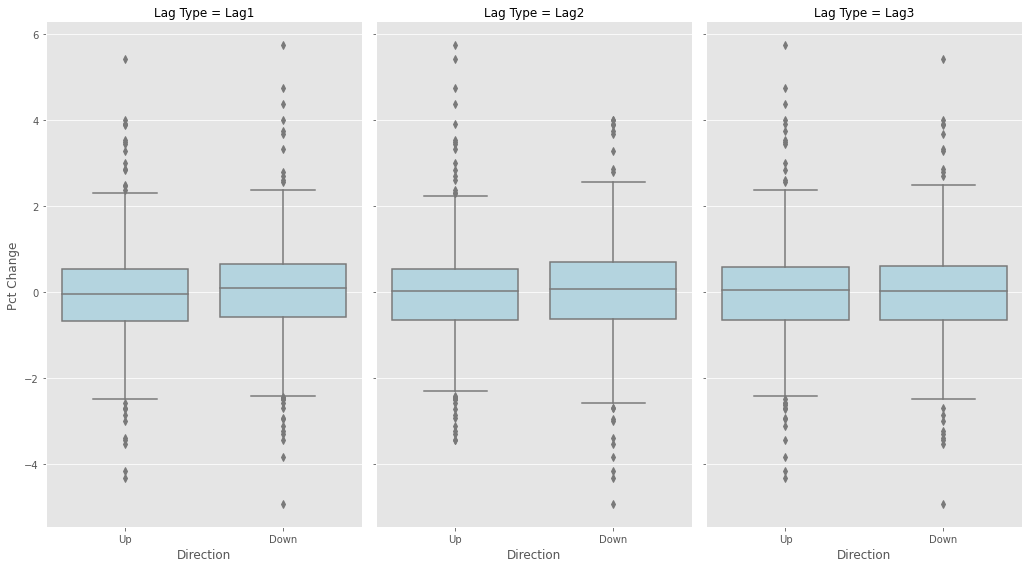

In [137]:
g = sns.FacetGrid(df_market_melt,col = 'Lag Type',height = 8,aspect = 0.6)
g = g.map(sns.boxplot,'Direction','Pct Change',color = 'lightblue')


All the plots at various lags are almost identical suggesting that there is no simple strategy for using yesterday’s movement in the S&P to predict today’s returns. The remaining panels, which display boxplots for the percentage changes 2 and 3 days previous to today, similarly indicate little association between past and present returns.

## Gene Expression Data

Above two example illustrates data sets with both input and output. However, another class of problems involve situation where we have observed input value but no corresponding output. This is known as *`clustering`* problem. Unlike in the previous examples, here we are not trying to predict an output variable. 


In [140]:
df_genes = pd.read_csv('data/nci60_data.csv',index_col=0)
df_genes.head()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654981,...,-0.990019,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285020,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350020,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [141]:
from sklearn.decomposition import PCA
pca = PCA(2)
df_genes_transformed = pd.DataFrame(pca.fit_transform(df_genes), columns=['PC1', 'PC2'])

C:\Users\amogg\Anaconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\amogg\Anaconda3\envs\ml\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


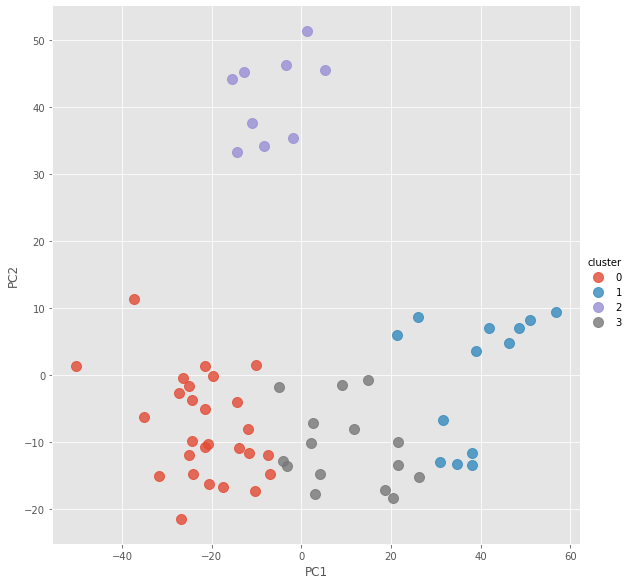

In [142]:
from sklearn.cluster import KMeans
kmeans = KMeans(4)
kmeans.fit(df_genes_transformed)
df_genes_transformed['cluster'] = kmeans.labels_
sns.lmplot('PC1', 'PC2', df_genes_transformed, fit_reg=False, hue='cluster', size=8, 
           scatter_kws={"marker": "D", "s": 100})

# End Of Chapter 1